In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('telco.csv')
df.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
is_senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
phone_service,1,2,1,1,1
internet_service,1,1,2,2,2
contract_type,1,0,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check
monthly_charges,65.6,59.9,73.9,98.0,83.9


# has_churned is x, independent variables, y, is everything else

In [3]:
#get shape, 7049 X 27
df.shape

(7049, 27)

In [4]:
df.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,partner_dependents,rounded_tenure
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000,7049.000000,7049.000000,7049.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883,32.380068,1.083416,32.374805
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984,24.594926,1.226883,24.596637
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500,8.700000,0.000000,9.000000
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000,28.700000,1.000000,29.000000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000,55.200000,2.000000,55.000000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000,79.300000,3.000000,79.000000


In [5]:
#find null values, since they represent 11/7049 values, comfortable removing them 
df.isna().sum()

customer_id                0
gender                     0
is_senior_citizen          0
partner                    0
dependents                 0
phone_service              0
internet_service           0
contract_type              0
payment_type               0
monthly_charges            0
total_charges             11
churn                      0
tenure                     0
is_female                  0
has_churned                0
has_phone                  0
has_internet               0
has_phone_internet         0
partner_dependents         0
calculated_monthly_avg     0
validate                   0
phone_service_type         0
Internet_service_type      0
Contract_type              0
rounded_tenure             0
Service_type               0
Tenure_binned              0
dtype: int64

In [6]:
#drop nulls
df = df.dropna()
df.shape

(7038, 27)

In [7]:
#Get percentage of customer churn
round(df[df.churn == 'Yes'].shape[0]/df.shape[0] * 100, 2)

26.57

In [8]:
#since we can't recommend canceling MTM, maybe MTM should be excluded from customer churn

#churn_2 = (df[df.churn] == 'Yes') & (df[df.Contract_type] == 'Month-to-Month') doesn't work

#try turning MTM into a boolean value first

df.Contract_type.value_counts() #MTM = 3876

#round(df[df.Contract_type != 'Month-to-Month'].shape[0]/df.shape[0] * 100, 2)


Month-to-Month    3876
2 Year            1687
1 Year            1475
Name: Contract_type, dtype: int64

In [9]:
#expressed as a percentage

round(df.Contract_type.value_counts('1 Year', '2 Year') * 100, 2)

Month-to-Month    55.07
2 Year            23.97
1 Year            20.96
Name: Contract_type, dtype: float64

In [10]:
#subset MTM churn only
new_mtm_df = (df['Contract_type'] == 'Month-to-Month')
mtm_df = df[new_mtm_df]
mtm_df.shape

(3876, 27)

In [11]:
mtm_df.has_churned.sum()

1656

In [12]:
#calculate MTM churn percentage

mtm_percent_churned = round(mtm_df.has_churned.sum() / len(mtm_df)* 100, 2)
print(f'Month-to-Month customers churn {mtm_percent_churned}% of the time.')

Month-to-Month customers churn 42.72% of the time.


In [13]:
#get booleans for 1 & 2 year, subset

new_df = (df['Contract_type'] == '1 Year') | (df['Contract_type'] == '2 Year')

df_c = df[new_df]

df_c.shape #subsetted, its now 3162 x 27


(3162, 27)

In [14]:
#subset of 1 & 2 Year contracts as a percentage 

round(df_c.Contract_type.value_counts('1 Year', '2 Year') * 100, 2)

2 Year    53.35
1 Year    46.65
Name: Contract_type, dtype: float64

In [15]:
# how many of these contracted customers churned?
df_c.has_churned.sum()


214

In [16]:
percent_churned = round(df_c.has_churned.sum() / len(df_c) * 100, 2)
print(f'The rate of churn for consumers under 1 - 2 Year contracts is {percent_churned}%.')


The rate of churn for consumers under 1 - 2 Year contracts is 6.77%.


In [25]:
#customer_id column has no value, so it can be dropped

df_c = df_c.drop(columns = 'customer_id', inplace = True)

df_c.head()

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,...,has_phone_internet,partner_dependents,calculated_monthly_avg,validate,phone_service_type,Internet_service_type,Contract_type,rounded_tenure,Service_type,Tenure_binned
0,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,...,True,3,65.60,TRUE,One Line,DSL,1 Year,9.0,Internet+Phone,<1 years
6,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,...,True,1,109.70,TRUE,One Line,Fiber Optic,2 Year,72.0,Internet+Phone,>5 years
7,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,...,True,1,84.65,TRUE,Two or More Lines,Fiber Optic,2 Year,64.0,Internet+Phone,>5 years
9,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,...,True,3,90.45,TRUE,Two or More Lines,DSL,2 Year,66.0,Internet+Phone,>5 years
10,Male,0,No,No,0,1,2,Credit card (automatic),45.20,2460.55,...,False,0,45.20,TRUE,No Phone Service,DSL,2 Year,54.0,Internet,4-5 years


In [31]:
#remove : ' (automatic)'' from payment_type to make eventual plot labels easier

df_c['payment_type'] = df_c['payment_type'].str.replace(' (automatic)', '', regex = False)
df_c.head(5)

/var/folders/ry/d9b6htx57bx_sj1vtzmy_pbw0000gn/T/ipykernel_11303/240522292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['payment_type'] = df_c['payment_type'].str.replace(' (automatic)', '', regex = False)


,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,...,has_phone_internet,partner_dependents,calculated_monthly_avg,validate,phone_service_type,Internet_service_type,Contract_type,rounded_tenure,Service_type,Tenure_binned
0,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,...,True,3,65.60,TRUE,One Line,DSL,1 Year,9.0,Internet+Phone,<1 years
6,Female,1,Yes,No,1,2,2,Bank transfer,109.70,7904.25,...,True,1,109.70,TRUE,One Line,Fiber Optic,2 Year,72.0,Internet+Phone,>5 years
7,Male,0,Yes,No,2,2,2,Credit card,84.65,5377.80,...,True,1,84.65,TRUE,Two or More Lines,Fiber Optic,2 Year,64.0,Internet+Phone,>5 years
9,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,...,True,3,90.45,TRUE,Two or More Lines,DSL,2 Year,66.0,Internet+Phone,>5 years
10,Male,0,No,No,0,1,2,Credit card,45.20,2460.55,...,False,0,45.20,TRUE,No Phone Service,DSL,2 Year,54.0,Internet,4-5 years


In [18]:
df_c.info() #calculated_monthly_avg is an object, change it to a float

df_c['calculated_monthly_avg'] = df_c['calculated_monthly_avg'].astype(float, errors = 'raise')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3162 entries, 0 to 7048
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3162 non-null   object 
 1   gender                  3162 non-null   object 
 2   is_senior_citizen       3162 non-null   int64  
 3   partner                 3162 non-null   object 
 4   dependents              3162 non-null   object 
 5   phone_service           3162 non-null   int64  
 6   internet_service        3162 non-null   int64  
 7   contract_type           3162 non-null   int64  
 8   payment_type            3162 non-null   object 
 9   monthly_charges         3162 non-null   float64
 10  total_charges           3162 non-null   float64
 11  churn                   3162 non-null   object 
 12  tenure                  3162 non-null   float64
 13  is_female               3162 non-null   bool   
 14  has_churned             3162 non-null   

/var/folders/ry/d9b6htx57bx_sj1vtzmy_pbw0000gn/T/ipykernel_11303/1779104104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['calculated_monthly_avg'] = df_c['calculated_monthly_avg'].astype(float, errors = 'raise')


In [19]:
#sns.barplot(data = df_c, x = 'calculated_monthly_avg', y = 'rounded_tenure', hue = 'gender')

In [32]:
import math

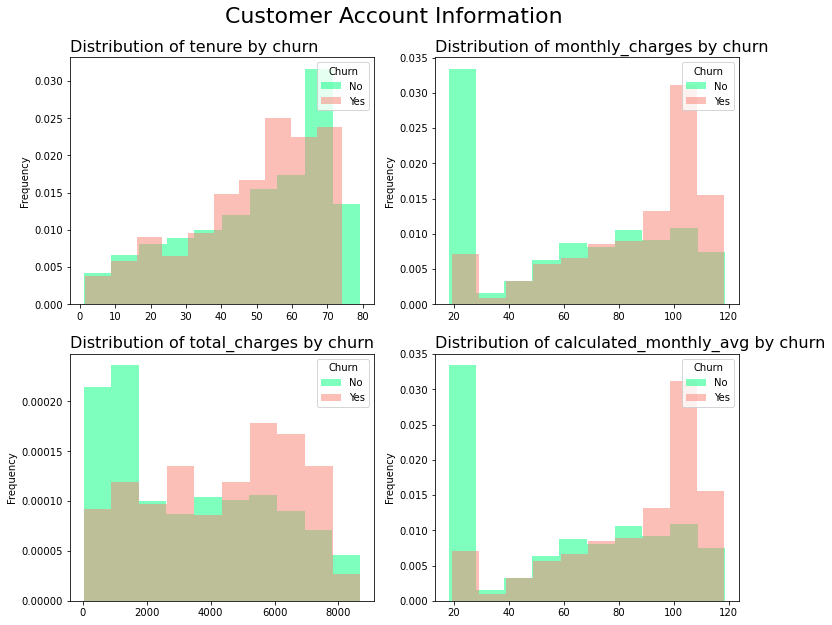

In [46]:
#create histogram function

def histogram_plots(columns_to_plot, super_title):
    #set number of rows and columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)
    
    #plot figure
    fig = plt.figure(figsize = (12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize = 22, y = .95)
    
    #loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        
        #create subplot
        ax = fig.add_subplot(number_of_rows , number_of_columns, index)
        
        #histograms for each class
        df_c[df_c['churn'] == 'No'][column].plot(kind = 'hist', 
                                                       ax = ax, 
                                                       density = True, 
                                                       alpha = 0.5, 
                                                       color = 'springgreen',
                                                       label = 'No')
        
        df_c[df_c['churn'] == 'Yes'][column].plot(kind = 'hist',
                                                        ax = ax,
                                                        density = True,
                                                        alpha = 0.5,
                                                        color = 'salmon', 
                                                        label = 'Yes')
    
        #set title and labels
    
        ax.set_title('Distribution of '+ column + ' by churn', 
                 fontsize = 16, loc = 'left')
        ax.tick_params(rotation = 'auto')
    
        ax.legend(loc = "upper right", bbox_to_anchor = (0.5, 0.5, 0.5, 0.5),
                  title = 'Churn', fancybox = True)
    
    #eliminate frame from plot
    #spine_names = ('top', 'right', 'bottom', 'left')
    #for spine_name in spine_names:
    #    ax.spine[spine_name].set_visible(False)
        
# customer account column names

account_column_numeric = ['tenure', 'monthly_charges', 'total_charges', 'calculated_monthly_avg' ]
histogram_plots(account_column_numeric, 'Customer Account Information')


In [20]:
#Some questions to answer: are women or men more likely to churn?



In [21]:
# Is age a factor in churn? 

In [22]:
# Does Electronic check vs. mailed check factor in churn?